# Ensemble Classification

We will focus on underage drinking. The data set contains data about high school students. Each row represents a single student. The columns include the characteristics of deidentified students. This is a binary classification task: predict whether a student drinks alcohol or not (this is the **Alc** column: 1=Yes, 0=No). This is an important prediction task to detect underage drinking and deploy intervention techniques. 

## Description of Variables

The description of variables are provided in "Alcohol - Data Dictionary.docx"

## Goal

Use the **alcohol.csv** data set and build a model to predict **Alc**.

# Read and Prepare the Data


In [52]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(3200432)


In [53]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Get the data

In [54]:
alcohol_data = pd.read_csv("alcohol.csv")
alcohol_data.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,gender,alc
0,18,2,1,4,2,0,5,4,2,5,2,M,1
1,18,4,3,1,0,0,4,4,2,3,9,M,1
2,15,4,3,2,3,0,5,3,4,5,0,F,0
3,15,3,3,1,4,0,4,3,3,3,10,F,0
4,17,3,2,1,2,0,5,3,5,5,2,M,1
5,17,3,2,2,3,0,5,4,3,4,13,M,0
6,15,4,4,1,3,0,5,2,3,4,7,F,0
7,16,4,3,1,3,0,4,3,4,5,0,F,0
8,14,2,3,3,3,0,5,2,2,3,1,F,1
9,17,3,3,1,3,0,4,3,3,3,10,M,1


## Find the total number of rows and other information like missing data

In [55]:
alcohol_data.shape

(34000, 13)

In [56]:
alcohol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         34000 non-null  int64 
 1   Medu        34000 non-null  int64 
 2   Fedu        34000 non-null  int64 
 3   traveltime  34000 non-null  int64 
 4   studytime   34000 non-null  int64 
 5   failures    34000 non-null  int64 
 6   famrel      34000 non-null  int64 
 7   freetime    34000 non-null  int64 
 8   goout       34000 non-null  int64 
 9   health      34000 non-null  int64 
 10  absences    34000 non-null  int64 
 11  gender      34000 non-null  object
 12  alc         34000 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.4+ MB


In [57]:
alcohol_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,alc
count,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000,34000.000000
mean,16.304588,3.473353,2.945853,1.174176,2.153029,0.027235,4.126676,3.222618,3.145059,3.413147,4.848206,0.477735
std,1.051145,1.573011,1.158278,0.860493,0.849178,0.258664,0.829495,0.747163,1.080084,1.263086,5.447010,0.499511
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,3.000000,1.000000,0.000000
50%,16.000000,4.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,3.000000,3.000000,0.000000
75%,17.000000,5.000000,4.000000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,4.000000,7.000000,1.000000
max,21.000000,8.000000,7.000000,7.000000,5.000000,7.000000,6.000000,6.000000,6.000000,8.000000,37.000000,1.000000


In [58]:
alcohol_data.isna().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
health        0
absences      0
gender        0
alc           0
dtype: int64

In [59]:
alcohol_data[["health","gender","alc"]].value_counts().sort_index()

health  gender  alc
0       F       0       138
                1       243
        M       0        12
                1        21
1       F       0       714
                1       723
        M       0       131
                1       203
2       F       0      2436
                1      1646
        M       0       648
                1       899
3       F       0      3639
                1      2202
        M       0      1815
                1      2112
4       F       0      2947
                1      1489
        M       0      2344
                1      3038
5       F       0       989
                1       496
        M       0      1480
                1      2280
6       F       0       131
                1        71
        M       0       312
                1       756
7       F       0         1
                1         2
        M       0        20
                1        60
8       M       1         2
dtype: int64

### Data Correlation Heat map

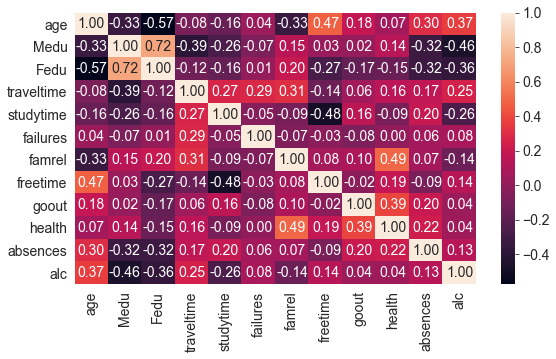

In [60]:
corr_alc = alcohol_data.dropna().corr()

sns.heatmap(corr_alc, annot=True, fmt='.2f')
plt.show()

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='freetime', ylabel='health'>

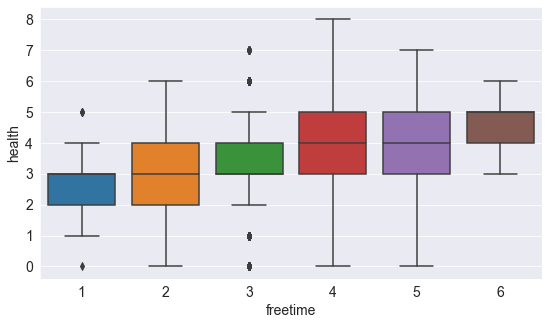

In [61]:
sns.boxplot(alcohol_data['freetime'],alcohol_data['health'])

## Split the data into train and test

In [62]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(alcohol_data, test_size=0.25)

## Since there are no missing values, we go into Data Prep

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

## Separate the target variable (we don't want to transform it)

In [64]:
train_y = train['alc']
test_y = test['alc']

train_inputs = train.drop(['alc'], axis=1)
test_inputs = test.drop(['alc'], axis=1)

## Feature Engineering: Let's derive a new column based on a KPI

#### Formula: `study_free_ratio` = `studytime` / `freetime`

In [65]:
def new_col(df):
    
    #Create a copy so that we don't overwrite the existing dataframe
    df1 = df.copy()

    # Use the formula, though fill in 0s when the value is 0/0 (because 0/0 generates "nan" values)
    df1['failure_per_study'] = (df1['studytime']/df1['freetime']).fillna(0)

    # Replace the infinity values with 1 (because a value divided by 0 generates infinity)
    df1['failure_per_study'].replace(np.inf, 1, inplace=True)

    return df1[['failure_per_study']]

In [66]:
#Let's test the new function:

# create a new dataframe from the two columns we need for the calculation
subset_df = train_inputs[['studytime' ,'freetime']]

# Send the new dataframe to the function we created
new_col(subset_df).sort_index()

,failure_per_study
0,0.500000
1,0.000000
2,1.000000
3,1.333333
4,0.666667
...,...
33992,1.000000
33993,0.666667
33994,0.500000
33995,0.500000


##  Identify the numerical and categorical columns

In [67]:
train_inputs.dtypes

age            int64
Medu           int64
Fedu           int64
traveltime     int64
studytime      int64
failures       int64
famrel         int64
freetime       int64
goout          int64
health         int64
absences       int64
gender        object
dtype: object

In [68]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [69]:
transformed_columns = ['studytime','freetime']

In [70]:
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences']

In [71]:
categorical_columns

['gender']

In [72]:
transformed_columns

['studytime', 'freetime']

# Pipeline

In [73]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [74]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [75]:
my_new_column = Pipeline(steps=[('my_new_column', FunctionTransformer(new_col)),
                               ('scaler', StandardScaler())])

In [76]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('trans', my_new_column, transformed_columns)],
        remainder='passthrough')

#passtrough is an optional step. You don't have to use it.

# Transform: fit_transform() for TRAIN

In [77]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-0.28634924,  0.33365774,  0.04618295, ...,  1.        ,
         0.        ,  0.59463168],
       [-0.28634924,  0.33365774,  0.91211328, ...,  1.        ,
         0.        ,  0.59463168],
       [ 1.61419881, -0.93870242, -1.6856777 , ...,  1.        ,
         0.        ,  0.59463168],
       ...,
       [-1.23662326, -0.93870242,  0.91211328, ...,  1.        ,
         0.        ,  0.59463168],
       [-1.23662326, -0.93870242,  0.04618295, ...,  0.        ,
         1.        , -0.18041983],
       [ 0.66392478, -0.93870242,  0.04618295, ...,  0.        ,
         1.        , -0.18041983]])

In [78]:
train_x.shape

(25500, 14)

# Tranform: transform() for TEST

In [79]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[-0.28634924,  0.33365774,  0.91211328, ...,  0.        ,
         1.        ,  0.59463168],
       [ 0.66392478, -0.93870242, -0.81974738, ...,  1.        ,
         0.        , -0.56794559],
       [ 1.61419881, -0.93870242, -0.81974738, ...,  0.        ,
         1.        , -0.18041983],
       ...,
       [-2.18689729,  0.33365774,  0.91211328, ...,  1.        ,
         0.        ,  1.75720894],
       [-0.28634924,  1.6060179 ,  0.91211328, ...,  1.        ,
         0.        , -0.56794559],
       [ 0.66392478,  0.33365774, -0.81974738, ...,  0.        ,
         1.        , -1.14923422]])

In [80]:
test_x.shape

(8500, 14)

# Baseline:

In [81]:
train_y.value_counts()/len(train_y)

0    0.523882
1    0.476118
Name: alc, dtype: float64

# Hard voting classifier (should include at least two models)

In [82]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


dtree_clf = DecisionTreeClassifier(max_depth=15)
log_clf = LogisticRegression(multi_class='ovr', solver = 'liblinear', C=10, max_iter=1000)
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)

voting_clf_hard = VotingClassifier(
            estimators=[('dt', dtree_clf), 
                        ('lr', log_clf), 
                        ('sgd', sgd_clf)],
            voting='hard')

voting_clf_hard.fit(train_x, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=15)),
                             ('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 multi_class='ovr',
                                                 solver='liblinear')),
                             ('sgd', SGDClassifier())])

## Accuracy

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
#Train accuracy

train_y_pred = voting_clf_hard.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.8313725490196079


In [85]:
#Test accuracy

test_y_pred = voting_clf_hard.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.815764705882353


## Inspect each classifier's accuracy

In [86]:
for clf in (dtree_clf, log_clf, sgd_clf, voting_clf_hard):
    clf.fit(train_x, train_y.ravel())
    test_y_pred = clf.predict(test_x)
    print(clf.__class__.__name__, 'Test acc=', accuracy_score(test_y, test_y_pred))

DecisionTreeClassifier Test acc= 0.7690588235294118
LogisticRegression Test acc= 0.8150588235294117
SGDClassifier Test acc= 0.8075294117647058
VotingClassifier Test acc= 0.8145882352941176


# Soft voting classifier

In [87]:
voting_clf_soft = VotingClassifier(
            estimators=[('dt', dtree_clf), 
                        ('lr', log_clf)],
            voting='soft')

voting_clf_soft.fit(train_x, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=15)),
                             ('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 multi_class='ovr',
                                                 solver='liblinear'))],
                 voting='soft')

## Accuracy

In [88]:
#Train accuracy

train_y_pred = voting_clf_soft.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.9076862745098039


In [89]:
#Test accuracy

test_y_pred = voting_clf_soft.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.7845882352941177


# Bagging classifier

In [90]:
from sklearn.ensemble import BaggingClassifier 


bag_clf = BaggingClassifier( 
            SGDClassifier(), n_estimators=25, 
            max_samples=1000, bootstrap=False, n_jobs=-1) 

bag_clf.fit(train_x, train_y)



BaggingClassifier(base_estimator=SGDClassifier(), bootstrap=False,
                  max_samples=1000, n_estimators=25, n_jobs=-1)

## Accuracy

In [91]:
#Train accuracy

train_y_pred = bag_clf.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.8233725490196079


In [92]:
#Test accuracy

test_y_pred = bag_clf.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.8150588235294117


# Random forest classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier 

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1,max_depth = 12 ) 

rnd_clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=12, n_estimators=500, n_jobs=-1)

## Accuracy

In [94]:
#Train accuracy

train_y_pred = rnd_clf.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.8732156862745099


In [95]:
#Test accuracy

test_y_pred = rnd_clf.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.8165882352941176


### Feature Importance

In [96]:
np.round(rnd_clf.feature_importances_,2)

array([0.11, 0.26, 0.09, 0.1 , 0.11, 0.  , 0.05, 0.03, 0.03, 0.04, 0.05,
       0.02, 0.02, 0.08])

# AdaBoost Classifier

In [106]:
from sklearn.ensemble import AdaBoostClassifier 

#Create Adapative Boosting with Decision Stumps (depth=1)
ada_clf = AdaBoostClassifier( 
            DecisionTreeClassifier(max_depth=2), n_estimators=500, 
            algorithm="SAMME.R", learning_rate=0.1) 

ada_clf.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=500)

## Accuracy

In [107]:
#Train accuracy

train_y_pred = ada_clf.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.8336078431372549


In [108]:
#Test accuracy

test_y_pred = ada_clf.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.8211764705882353


# Stochastic Gradient Boosting Classifier

In [103]:
#Train on 75% of the sample only
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(max_depth=3, n_estimators=500, 
                                   learning_rate=0.1, subsample=0.75) 

gbclf.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=500, subsample=0.75)

## Accuracy

In [104]:
#Train accuracy

train_y_pred = gbclf.predict(train_x)

train_acc = accuracy_score(train_y, train_y_pred)

print('Train acc: {}' .format(train_acc))

Train acc: 0.8444313725490196


In [105]:
#Test accuracy

test_y_pred = gbclf.predict(test_x)

test_acc = accuracy_score(test_y, test_y_pred)

print('Test acc: {}' .format(test_acc))

Test acc: 0.8265882352941176


# Discussion

1) Which model performs the best (and why)?<br>
2) What is the baseline?<br>
3) Does the best model perform better than the baseline (and why)?<br>
4) Does the best model exhibit any overfitting; what did you do about it?

##### 1. The best model is the Stochastic Gradient Boosting Classifier model because its test accuracy is better than rest of the models(82.7%)
##### 2. The baseline is 52%
##### 3. Yes, the Stochastic Gradient Boosting Classifier model performs better than the baseline since it is greater than the baseline percentage.
##### 4. No, the model does not exhibit overfitting.
